In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Variable description:
- Customer_id = unique customer id
- Age = customer's age
- Gender = 0: Male, 1: Female
- Revenue_Total = total sales by customer
- N_Purchases = number of purchases to date
- Purchase_DATE = date latest purchase, dd.mm.yy
- Purchase_VALUE = latest purchase in €
- Pay_Method = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other
- Time_Spent = time spent (in sec) on website
- Browser = 0: Chrome, 1: Safari, 2: Edge, 3: Other
- Newsletter = 0: not subscribed, 1: subscribed
- Voucher = 0: not used, 1: used

In [2]:
df=pd.read_csv('Online Shop Customer Sales Data.csv')
df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0


In [3]:
df.duplicated().sum()

0

In [4]:
df.columns

Index(['Customer_id', 'Age', 'Gender', 'Revenue_Total', 'N_Purchases',
       'Purchase_DATE', 'Purchase_VALUE', 'Pay_Method', 'Time_Spent',
       'Browser', 'Newsletter', 'Voucher'],
      dtype='object')

In [5]:
df.isna().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


In [7]:
df['Purchase_DATE'] = pd.to_datetime(df['Purchase_DATE'])
df['Month'] = df['Purchase_DATE'].dt.month
df['Year'] = df['Purchase_DATE'].dt.year

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_id,65796.0,537205.500000,18993.813493,504308.000,520756.75000,537205.50,553654.250,570103.0
Age,65796.0,39.592696,13.825466,16.000,28.00000,40.00,51.000,63.0
Gender,65796.0,0.671348,0.469727,0.000,0.00000,1.00,1.000,1.0
Revenue_Total,65796.0,27.732935,14.941878,0.500,15.30000,30.10,37.600,59.9
N_Purchases,65796.0,3.992477,2.004370,1.000,2.00000,4.00,6.000,7.0
Purchase_VALUE,65796.0,15.968699,13.229295,0.005,4.81975,12.64,24.752,59.9
Pay_Method,65796.0,1.308651,1.081959,0.000,0.00000,1.00,2.000,3.0
Time_Spent,65796.0,598.925603,277.833635,120.000,358.00000,598.00,840.000,1080.0
Browser,65796.0,0.630935,0.996407,0.000,0.00000,0.00,1.000,3.0
Newsletter,65796.0,0.151027,0.358078,0.000,0.00000,0.00,0.000,1.0


In [9]:
#remove rows with year = 2022 (we only analyze data of 2021)
remove_2022 = df[df['Year'] == 2022].index
df.drop(remove_2022 , inplace=True)
df

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month,Year
0,504308,53,0,45.3,2,2021-06-22,24.915,1,885,0,0,0,6,2021
1,504309,18,1,36.2,3,2021-10-12,2.896,2,656,0,0,1,10,2021
2,504310,52,1,10.6,1,2021-03-14,10.600,0,761,0,1,0,3,2021
3,504311,29,0,54.1,5,2021-10-25,43.280,1,906,0,1,0,10,2021
4,504312,21,1,56.9,1,2021-09-14,56.900,1,605,0,1,0,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,2021-02-15,6.213,1,894,0,0,0,2,2021
65792,570100,33,0,29.3,1,2021-05-02,29.300,0,722,0,0,0,5,2021
65793,570101,50,0,25.4,5,2021-10-29,23.114,3,424,0,0,0,10,2021
65794,570102,56,0,29.2,1,2021-09-12,29.200,3,731,0,0,0,9,2021


#  Identifying and excluding outliers 

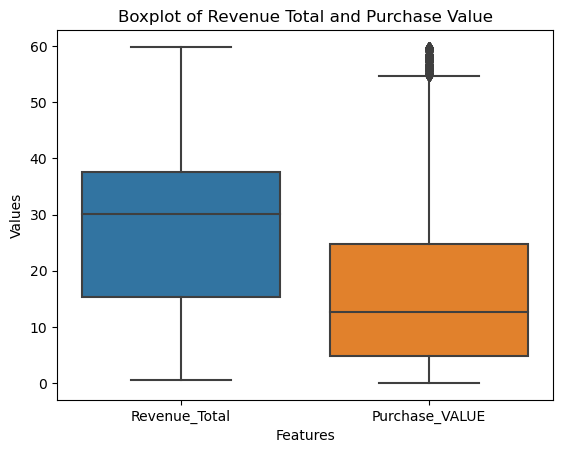

In [10]:
# Create the boxplot
sns.boxplot(data = df[['Revenue_Total', 'Purchase_VALUE']])

# Set the title/labels
plt.title('Boxplot of Revenue Total and Purchase Value')
plt.xlabel('Features')
plt.ylabel('Values')

plt.show()

(Borrowed from MICAELD - Kaggle)
Use z-score to exclude outliers.
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

The z-score is calculated by the difference between the specific value and the mean of the data set, divided by the standard deviation of the data set. The formula for calculating the z-score is as follows:

z = (x - μ) / σ

where:

x is the specific value

μ is the mean of the data set

σ is the standard deviation of the data set

In [11]:
# Calculate the mean and std
mean = np.mean(df['Purchase_VALUE'])
std = np.std(df['Purchase_VALUE'])

# Calculate the Z-score
z_scores = (df['Purchase_VALUE'] - mean) / std

# Set a Z-score threshold
threshold = 3

# Identify the indices of the outliers based on the Z-score threshold
outlier_indices = np.where(np.abs(z_scores) > threshold)
# Drop the outliers
df.drop(df.index[outlier_indices], inplace = True)

# Distribution of variables

<Figure size 1500x2800 with 0 Axes>

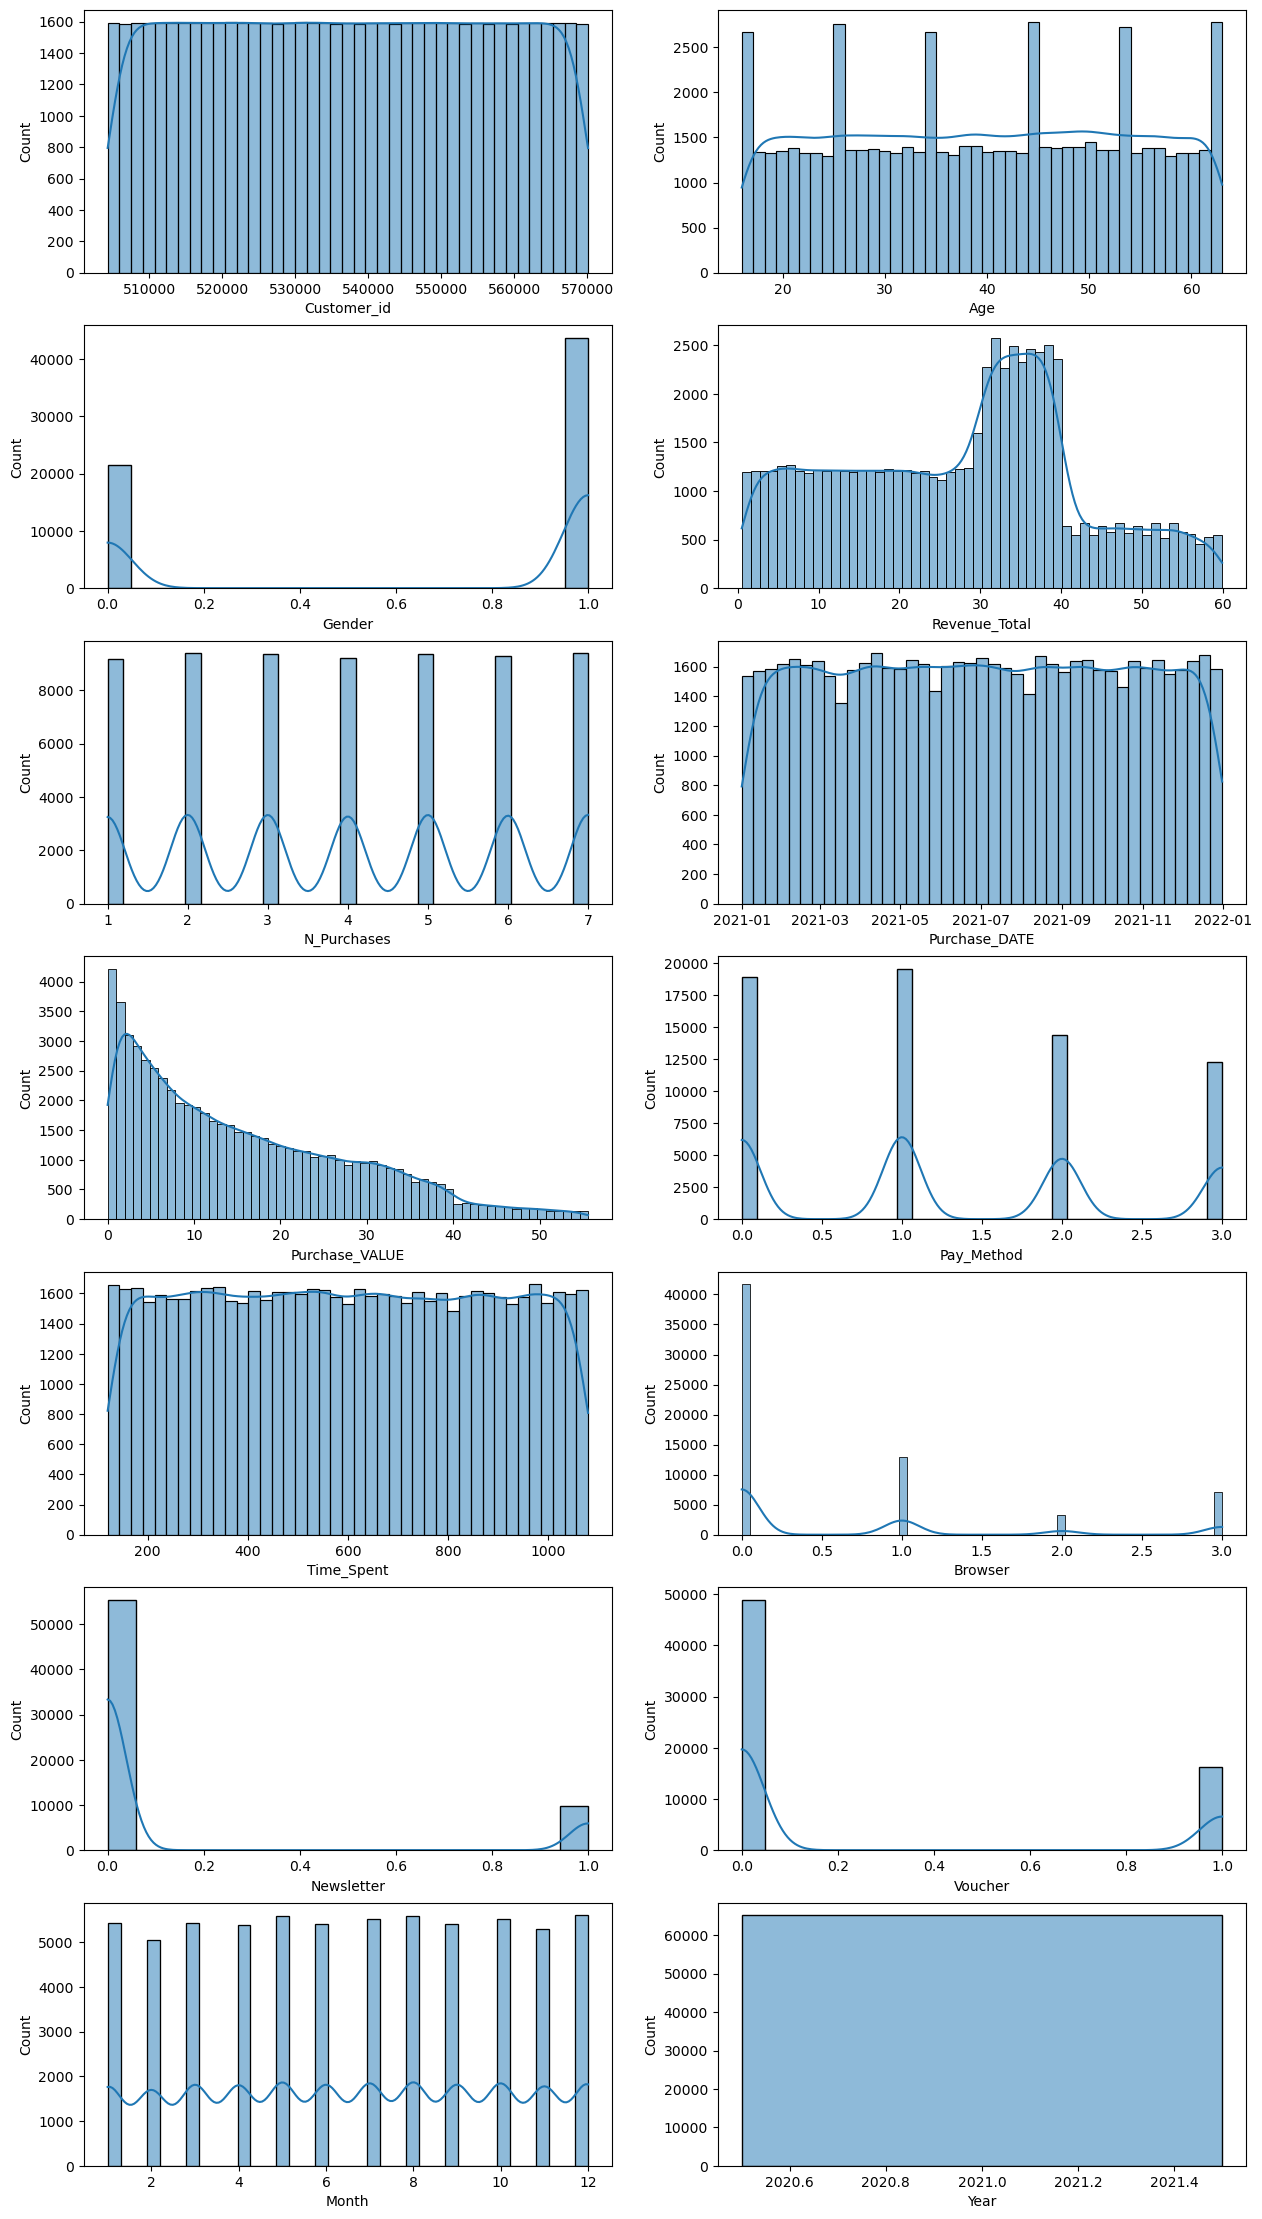

In [18]:
# Set the background color and figsize
plt.figure(figsize = (15, 28))

# Adjust subplot vertical spacing
plt.subplots_adjust(hspace = 0.2)

# 7x2 subplot figure
fig, axs = plt.subplots(7, 2, figsize = (15, 28))

i = 1
# Loop through dataframe columns
for feature in df.columns:
    # Create a subplot
    plt.subplot(7, 2, i)
    # Create histogram
    sns.histplot(data = df, x = feature, kde = True)
    i += 1
    
# Show the plot
plt.show()

# Initial insights:
1. Gender: female double vs male
2. Card/Digital vallet are more prefered than paypal or cash (x1.25)
3. Most of customer subsribe Newsletter (x5)
4. Most of customer not use voucher

In [21]:
df['Gender'] = df['Gender'].replace([0, 1], ['Male', 'Female'])
df['Pay_Method'] = df['Pay_Method'].replace([0, 1, 2, 3], ['Digital Wallets', 'Card', 'Paypal', 'Others'])
df['Browser'] = df['Browser'].replace([0, 1, 2, 3], ['Chrome', 'Safari', 'Edge', 'Others'])
df['Newsletter'] = df['Newsletter'].replace([0, 1], ['not subscribed', 'subscribed'])
df['Voucher'] = df['Voucher'].replace([0, 1], ['not used', 'used'])
df.head(10)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month,Year
0,504308,53,Male,45.3,2,2021-06-22,24.915,Card,885,Chrome,not subscribed,not used,6,2021
1,504309,18,Female,36.2,3,2021-10-12,2.896,Paypal,656,Chrome,not subscribed,used,10,2021
2,504310,52,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,subscribed,not used,3,2021
3,504311,29,Male,54.1,5,2021-10-25,43.280,Card,906,Chrome,subscribed,not used,10,2021
5,504313,55,Male,13.7,6,2021-05-14,12.467,Card,364,Safari,not subscribed,not used,5,2021
6,504314,17,Female,30.7,6,2021-09-01,2.456,Digital Wallets,654,Chrome,not subscribed,not used,9,2021
7,504315,30,Female,8.1,7,2021-03-28,6.561,Others,1011,Chrome,not subscribed,not used,3,2021
8,504316,51,Male,18.0,4,2021-04-08,11.880,Digital Wallets,312,Others,subscribed,not used,4,2021
9,504317,63,Female,19.2,4,2021-06-10,11.904,Others,828,Chrome,not subscribed,not used,6,2021
10,504318,26,Male,36.5,5,2021-12-31,31.390,Paypal,1029,Chrome,not subscribed,used,12,2021


In [22]:
df.to_csv('Data Clean.csv', mode='w', index = False)